In [1]:

#!pip install -U textblob-de==0.4.3


In [2]:
import textblob
import pandas as pd
import numpy as np
from textblob_de import TextBlobDE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

In [3]:
#path = 'goggledaten.csv'
#print(open(path).read())


In [4]:
df = pd.read_csv("Klinikbewertungen.csv")

In [5]:
#df = pd.read_csv("goggledaten.csv", encoding="utf-8")
#data = pd.read_csv(path, skiprows=2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Klinikname                           3032 non-null   object
 1   Nutzername                           3032 non-null   object
 2   Titel                                3032 non-null   object
 3   Datum                                3032 non-null   object
 4   Behandlungsjahr                      3032 non-null   object
 5   Berichtet als                        3032 non-null   object
 6   Daumen hoch/runter                   3032 non-null   object
 7   Fachbereich                          3032 non-null   object
 8   Gesamtzufriedenheit                  3032 non-null   int64 
 9   Textuell Gesamtzufriedenheit         3032 non-null   object
 10  Beratungsqualität                    3032 non-null   int64 
 11  Textuell Beratungsqualität           3032 n

In [7]:
df.head(10)

,Klinikname,Nutzername,Titel,Datum,Behandlungsjahr,Berichtet als,Daumen hoch/runter,Fachbereich,Gesamtzufriedenheit,Textuell Gesamtzufriedenheit,...,Ausstattung und Gestaltung,Textuell Ausstattung und Gestaltung,Pro,Kontra,Krankheitsbild,Privatpatient,Erfahrungsbericht,Kommentare,URL,Extraktionsdatum
0,MediClin Seepark Klinik,Noname136,Organisation ist ein Fremdwort,19.05.2021,Jahr der Behandlung: 20121,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,"Die Schwestern der MZ, Ernährungstherapeuten",siehe Bericht,"Bulemie, Depressionen",nein,Hatte mir mehr versprochen Die Organisation l...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
1,MediClin Seepark Klinik,noname22,Es war die Hölle auf Erden,11.04.2021,Jahr der Behandlung: 18,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,2,weniger zufrieden (In den Zimmern roch es nach...,die Kunsttherapie war klasse!,Therapeuten; das Essen; Ich als Patient wurde ...,Depression,nein,Es war die absolute Hölle! Die Therapeuten ka...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
2,MediClin Seepark Klinik,Cl.A.,Abschlussbericht,11.04.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden (Siehe oben)\n,...,2,weniger zufrieden (Null acht fünfzehn- Program...,-,Nein siehe oben!!!!!!!,Nachsorge und Begleitung nach einer Magen-Oper...,nein,Als grundpositiv eingestellter Mensch wollte i...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
3,MediClin Seepark Klinik,xx.,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Jahr der Behandlung: 2020 /21,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,Das Essen,"Die Mitarbeiter, Chefarzt, Therapien",Anorexie,nein,Ich war für ca 5 Monate in der Klinik gewesen....,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
4,MediClin Seepark Klinik,Ellie.,Durchaus ein Ort zum Genesen,28.03.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen hoch,Psychosomatik,4,zufrieden\n,...,6,sehr zufrieden\n,Direkte (aber nette) und offene Art mit der Er...,-,"Anorexie, Depressionen",nein,"Als ich in die Klinik ankam, wurde ich freundl...",Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
5,MediClin Seepark Klinik,BigM20,Slechte Klinik,28.01.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,2,weniger zufrieden\n,Der Kaffee,Personal ist ihre Aufgaben nicht gewachsen,Depressionen,nein,Eine sehr slechte Klinik die mich wenig gutes ...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
6,MediClin Seepark Klinik,LeonyHope,Kein Ort zum Gesen.,20.12.2020,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,0,unzufrieden\n,Für extremst untergewichtige Patienten geeignet,Eine Nummer im System,Anorexie,nein,Diese Bewertung bezieht sich auf die Akutstati...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
7,MediClin Seepark Klinik,meingeheimnis,Gute Klinik aber...,16.11.2020,Jahr der Behandlung: 2020,berichtet als Patient,Daumen hoch,Psychosomatik,4,zufrieden\n,...,2,weniger zufrieden\n,Fast alles,Die immer gleichen Patienten die das scheinbar...,Anorexie,nein,Ich war selbst mehrfach im Akutbereich der SPK...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
8,MediClin Seepark Klinik,moi5,hoffe nicht mehr,04.09.2020,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,0,unzufrieden\n,nix,-,psychosomatisch,nein,"Ich soll in diese Klinik, weil es mir schlecht...",Meli12896maty am 05.01.2021: Hallo Moi \n\nGeh...,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
9,MediClin Seepark Klinik,Keinname4,klinik Bad bodenteich,19.08.2020,Jahr der Behandlun

In [8]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Percentage of missing values of the columns:')

missing_data

Percentage of missing values of the columns:


,Count,Percentage
Kontra,1,0.032982
Extraktionsdatum,0,0.000000
Textuell Beratungsqualität,0,0.000000
Nutzername,0,0.000000
Titel,0,0.000000
Datum,0,0.000000
Behandlungsjahr,0,0.000000
Berichtet als,0,0.000000
Daumen hoch/runter,0,0.000000
Fachbereich,0,0.000000


In [9]:

df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3031 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Klinikname                           3031 non-null   object
 1   Nutzername                           3031 non-null   object
 2   Titel                                3031 non-null   object
 3   Datum                                3031 non-null   object
 4   Behandlungsjahr                      3031 non-null   object
 5   Berichtet als                        3031 non-null   object
 6   Daumen hoch/runter                   3031 non-null   object
 7   Fachbereich                          3031 non-null   object
 8   Gesamtzufriedenheit                  3031 non-null   int64 
 9   Textuell Gesamtzufriedenheit         3031 non-null   object
 10  Beratungsqualität                    3031 non-null   int64 
 11  Textuell Beratungsqualität           3031 n

In [11]:

df = df.replace('\n',' ', regex=True)

In [12]:

df.head()

,Klinikname,Nutzername,Titel,Datum,Behandlungsjahr,Berichtet als,Daumen hoch/runter,Fachbereich,Gesamtzufriedenheit,Textuell Gesamtzufriedenheit,...,Ausstattung und Gestaltung,Textuell Ausstattung und Gestaltung,Pro,Kontra,Krankheitsbild,Privatpatient,Erfahrungsbericht,Kommentare,URL,Extraktionsdatum
0,MediClin Seepark Klinik,Noname136,Organisation ist ein Fremdwort,19.05.2021,Jahr der Behandlung: 20121,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden,...,2,weniger zufrieden,"Die Schwestern der MZ, Ernährungstherapeuten",siehe Bericht,"Bulemie, Depressionen",nein,Hatte mir mehr versprochen Die Organisation l...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
1,MediClin Seepark Klinik,noname22,Es war die Hölle auf Erden,11.04.2021,Jahr der Behandlung: 18,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden,...,2,weniger zufrieden (In den Zimmern roch es nach...,die Kunsttherapie war klasse!,Therapeuten; das Essen; Ich als Patient wurde ...,Depression,nein,Es war die absolute Hölle! Die Therapeuten ka...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
2,MediClin Seepark Klinik,Cl.A.,Abschlussbericht,11.04.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden (Siehe oben),...,2,weniger zufrieden (Null acht fünfzehn- Program...,-,Nein siehe oben!!!!!!!,Nachsorge und Begleitung nach einer Magen-Oper...,nein,Als grundpositiv eingestellter Mensch wollte i...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
3,MediClin Seepark Klinik,xx.,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Jahr der Behandlung: 2020 /21,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden,...,2,weniger zufrieden,Das Essen,"Die Mitarbeiter, Chefarzt, Therapien",Anorexie,nein,Ich war für ca 5 Monate in der Klinik gewesen....,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
4,MediClin Seepark Klinik,Ellie.,Durchaus ein Ort zum Genesen,28.03.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen hoch,Psychosomatik,4,zufrieden,...,6,sehr zufrieden,Direkte (aber nette) und offene Art mit der Er...,-,"Anorexie, Depressionen",nein,"Als ich in die Klinik ankam, wurde ich freundl...",Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021


In [13]:
print(df['Erfahrungsbericht'][900])

super tolle und nette Hebammen. .hab meine Tochter während ihrer ersten Geburt 3 Tage zur Seite gestanden und kann nur positives über die Betreuung berichten.. perfekt so wie man sich als Frau eine Geburt wünscht


In [14]:
#df['Gesamt'] = df['Textuell Gesamtzufriedenheit'].str.split('-').str[1]
#df['Fachbereich'] = df['Fachbereich'].str.split('-').str[1]
#df['MedBehandlung'] = df['MedizBehandlung'].str.split('-').str[1]
#df['VerwalAblaeufe'] = df['VerwaltungAblaeufe'].str.split('-').str[1]

In [15]:

#df['Gesamt'] = pd.to_numeric(df['Gesamt']).apply(starAdjust)
#df['QualBeratung'] = pd.to_numeric(df['QualBeratung']).apply(starAdjust)
#df['MedBehandlung'] = pd.to_numeric(df['MedBehandlung']).apply(starAdjust)
#df['VerwalAblaeufe'] = pd.to_numeric(df['VerwalAblaeufe']).apply(starAdjust)

In [16]:
df.head(2)

,Klinikname,Nutzername,Titel,Datum,Behandlungsjahr,Berichtet als,Daumen hoch/runter,Fachbereich,Gesamtzufriedenheit,Textuell Gesamtzufriedenheit,...,Ausstattung und Gestaltung,Textuell Ausstattung und Gestaltung,Pro,Kontra,Krankheitsbild,Privatpatient,Erfahrungsbericht,Kommentare,URL,Extraktionsdatum
0,MediClin Seepark Klinik,Noname136,Organisation ist ein Fremdwort,19.05.2021,Jahr der Behandlung: 20121,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden,...,2,weniger zufrieden,"Die Schwestern der MZ, Ernährungstherapeuten",siehe Bericht,"Bulemie, Depressionen",nein,Hatte mir mehr versprochen Die Organisation l...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
1,MediClin Seepark Klinik,noname22,Es war die Hölle auf Erden,11.04.2021,Jahr der Behandlung: 18,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden,...,2,weniger zufrieden (In den Zimmern roch es nach...,die Kunsttherapie war klasse!,Therapeuten; das Essen; Ich als Patient wurde ...,Depression,nein,Es war die absolute Hölle! Die Therapeuten ka...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021


In [17]:

df = df[['Klinikname', 'Erfahrungsbericht','Gesamtzufriedenheit', 'Extraktionsdatum']].round(1)

In [18]:
df.head(10)

,Klinikname,Erfahrungsbericht,Gesamtzufriedenheit,Extraktionsdatum
0,MediClin Seepark Klinik,Hatte mir mehr versprochen Die Organisation l...,2,01.06.2021
1,MediClin Seepark Klinik,Es war die absolute Hölle! Die Therapeuten ka...,0,01.06.2021
2,MediClin Seepark Klinik,Als grundpositiv eingestellter Mensch wollte i...,0,01.06.2021
3,MediClin Seepark Klinik,Ich war für ca 5 Monate in der Klinik gewesen....,2,01.06.2021
4,MediClin Seepark Klinik,"Als ich in die Klinik ankam, wurde ich freundl...",4,01.06.2021
5,MediClin Seepark Klinik,Eine sehr slechte Klinik die mich wenig gutes ...,0,01.06.2021
6,MediClin Seepark Klinik,Diese Bewertung bezieht sich auf die Akutstati...,0,01.06.2021
7,MediClin Seepark Klinik,Ich war selbst mehrfach im Akutbereich der SPK...,4,01.06.2021
8,MediClin Seepark Klinik,"Ich soll in diese Klinik, weil es mir schlecht...",0,01.06.2021
9,MediClin Seepark Klinik,"Als erstes, wenn möglich sucht euch eine ander...",0,01.06.2021


In [19]:

df.describe()

,Gesamtzufriedenheit
count,3031.000000
mean,3.808644
std,2.593786
min,0.000000
25%,0.000000
50%,6.000000
75%,6.000000
max,6.000000


In [20]:
np.unique(df['Gesamtzufriedenheit'], axis=0)

array([0, 2, 4, 6], dtype=int64)

In [21]:
def starConverter(num):
    if int(num) > 3:
        happiness = 'pos'
    else:
        happiness = 'neg'
    return happiness

In [22]:
df['Gesamtzufriedenheit'] = np.where(df['Gesamtzufriedenheit'] >3, 1, 0)

In [23]:
df['Zufriedenheit'] = df['Gesamtzufriedenheit'].apply(starConverter)

In [24]:
df.head()

,Klinikname,Erfahrungsbericht,Gesamtzufriedenheit,Extraktionsdatum,Zufriedenheit
0,MediClin Seepark Klinik,Hatte mir mehr versprochen Die Organisation l...,0,01.06.2021,neg
1,MediClin Seepark Klinik,Es war die absolute Hölle! Die Therapeuten ka...,0,01.06.2021,neg
2,MediClin Seepark Klinik,Als grundpositiv eingestellter Mensch wollte i...,0,01.06.2021,neg
3,MediClin Seepark Klinik,Ich war für ca 5 Monate in der Klinik gewesen....,0,01.06.2021,neg
4,MediClin Seepark Klinik,"Als ich in die Klinik ankam, wurde ich freundl...",1,01.06.2021,neg


In [25]:
df['ist_zufrieden'] = np.where(df['Zufriedenheit']=='pos', 1, 0)

In [26]:
df.head(30)

,Klinikname,Erfahrungsbericht,Gesamtzufriedenheit,Extraktionsdatum,Zufriedenheit,ist_zufrieden
0,MediClin Seepark Klinik,Hatte mir mehr versprochen Die Organisation l...,0,01.06.2021,neg,0
1,MediClin Seepark Klinik,Es war die absolute Hölle! Die Therapeuten ka...,0,01.06.2021,neg,0
2,MediClin Seepark Klinik,Als grundpositiv eingestellter Mensch wollte i...,0,01.06.2021,neg,0
3,MediClin Seepark Klinik,Ich war für ca 5 Monate in der Klinik gewesen....,0,01.06.2021,neg,0
4,MediClin Seepark Klinik,"Als ich in die Klinik ankam, wurde ich freundl...",1,01.06.2021,neg,0
5,MediClin Seepark Klinik,Eine sehr slechte Klinik die mich wenig gutes ...,0,01.06.2021,neg,0
6,MediClin Seepark Klinik,Diese Bewertung bezieht sich auf die Akutstati...,0,01.06.2021,neg,0
7,MediClin Seepark Klinik,Ich war selbst mehrfach im Akutbereich der SPK...,1,01.06.2021,neg,0
8,MediClin Seepark Klinik,"Ich soll in diese Klinik, weil es mir schlecht...",0,01.06.2021,neg,0
9,MediClin Seepark Klinik,"Als erstes, wenn möglich sucht euch eine ander...",0,01.06.2021,neg,0


# Groupmachen

In [29]:

df['Klinikname'].value_counts()

MediClin Seepark Klinik                                                        383
Klinikum Wilhelmshaven gGmbH                                                   370
Klinikum Oldenburg                                                             355
Pius-Hospital                                                                  208
Evangelisches Krankenhaus Oldenburg                                            198
Niels-Stensen-Kliniken - Marienhospital Osnabrück                              194
Aller-Weser-Klinik - Klinik Verden                                             177
Ammerland-Klinik                                                               164
Klinikum Uelzen GmbH                                                           149
Karl-Jaspers-Klinik                                                            139
Klinikum Emden                                                                 117
Städtische Kliniken Osnabrück                                                  114
AMEO

In [32]:
kb_stars = df[['Klinikname', 'Gesamtzufriedenheit', 'Zufriedenheit']]

In [33]:
kb_stars

,Klinikname,Gesamtzufriedenheit,Zufriedenheit
0,MediClin Seepark Klinik,0,neg
1,MediClin Seepark Klinik,0,neg
2,MediClin Seepark Klinik,0,neg
3,MediClin Seepark Klinik,0,neg
4,MediClin Seepark Klinik,1,neg
...,...,...,...
3027,Bundeswehrkrankenhaus Westerstede,1,neg
3028,Bundeswehrkrankenhaus Westerstede,1,neg
3029,Bundeswehrkrankenhaus Westerstede,1,neg
3030,Bundeswehrkrankenhaus Westerstede,1,neg


In [35]:
kb_means = kb_stars.groupby(['Klinikname'], as_index=False)['Gesamtzufriedenheit'].mean()

In [36]:
kb_means = kb_stars[['Klinikname', 'Gesamtzufriedenheit', 'Zufriedenheit']]

In [38]:
kb_means = kb_means.sort_values(by='Gesamtzufriedenheit', ascending=False)

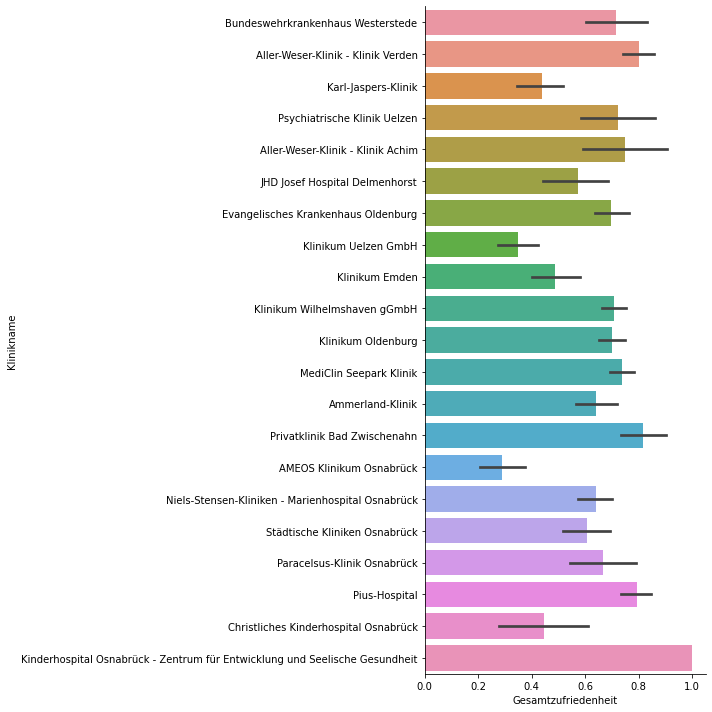

In [48]:
kb_means = kb_means.sort_values('Gesamtzufriedenheit')
sns.catplot(x="Gesamtzufriedenheit",y="Klinikname",data = kb_means, kind="bar", height=10, aspect=1)

# Textblob Klassification

In [40]:

reviews = [str(a) for a in df['Erfahrungsbericht']]
resultPolarity = []

In [41]:
for review in reviews:
    bewertungen = TextBlobDE(review)
    resultPolarity.append(bewertungen.polarity)

In [42]:
#len(resultPolarity)

3031

In [49]:

print(resultPolarity)

[0.12564102564102564, -0.06764705882352941, 0.03974358974358974, 0.08437499999999999, 0.18478260869565216, 0.1, -0.10308641975308643, 0.6802564102564103, -0.2, -0.013636363636363629, 0.2233333333333333, -0.00454545454545455, 0.2222222222222222, 0.37270833333333336, 0.00555555555555556, 0.2125, 0.04523809523809524, 0.4192307692307693, -0.085, -0.16466666666666666, 0.3009259259259259, 0.27, 0.7111111111111111, 0.5094444444444445, 0.38571428571428573, 0.5, -0.08409090909090909, 0.36311111111111116, 0.41, 0.04583333333333334, 0.5033333333333333, 0.5785714285714285, -0.3407407407407408, 0.8375, 0.3852941176470588, 0.0, 0.13636363636363638, 0.04999999999999999, 0.0, 0.5875, 0.16875, 0.5, 0.3944444444444444, -0.04754901960784313, 0.12986111111111112, 0.294, -0.09166666666666663, 0.4142857142857143, 0.6285714285714287, 0.3092592592592593, 0.375, 0.38571428571428573, 0.15357142857142855, 0.809375, 0.5380952380952381, 0.7000000000000001, 0.86, -0.21923076923076923, 0.0, 0.5019230769230769, 0.125

In [50]:

df['Polarity Level'] = resultPolarity

In [51]:
df.round(2).head(50)

,Klinikname,Erfahrungsbericht,Gesamtzufriedenheit,Extraktionsdatum,Zufriedenheit,ist_zufrieden,Polarity Level
0,MediClin Seepark Klinik,Hatte mir mehr versprochen Die Organisation l...,0,01.06.2021,neg,0,0.13
1,MediClin Seepark Klinik,Es war die absolute Hölle! Die Therapeuten ka...,0,01.06.2021,neg,0,-0.07
2,MediClin Seepark Klinik,Als grundpositiv eingestellter Mensch wollte i...,0,01.06.2021,neg,0,0.04
3,MediClin Seepark Klinik,Ich war für ca 5 Monate in der Klinik gewesen....,0,01.06.2021,neg,0,0.08
4,MediClin Seepark Klinik,"Als ich in die Klinik ankam, wurde ich freundl...",1,01.06.2021,neg,0,0.18
5,MediClin Seepark Klinik,Eine sehr slechte Klinik die mich wenig gutes ...,0,01.06.2021,neg,0,0.10
6,MediClin Seepark Klinik,Diese Bewertung bezieht sich auf die Akutstati...,0,01.06.2021,neg,0,-0.10
7,MediClin Seepark Klinik,Ich war selbst mehrfach im Akutbereich der SPK...,1,01.06.2021,neg,0,0.68
8,MediClin Seepark Klinik,"Ich soll in diese Klinik, weil es mir schlecht...",0,01.06.2021,neg,0,-0.20
9,MediClin Seepark Klinik,"Als erstes, wenn möglich sucht euch eine ander...",0,01.06.2021,neg,0,-0.01


In [53]:
final_df = df.groupby(['Klinikname'])['Polarity Level'].mean()

In [54]:
final_df.sort_values(ascending=False)

Klinikname
Kinderhospital Osnabrück - Zentrum für Entwicklung und Seelische Gesundheit    0.522222
Bundeswehrkrankenhaus Westerstede                                              0.390962
Aller-Weser-Klinik - Klinik Verden                                             0.344411
Pius-Hospital                                                                  0.322221
Klinikum Oldenburg                                                             0.300214
Psychiatrische Klinik Uelzen                                                   0.293664
Klinikum Wilhelmshaven gGmbH                                                   0.276075
Paracelsus-Klinik Osnabrück                                                    0.274420
MediClin Seepark Klinik                                                        0.254286
Ammerland-Klinik                                                               0.253321
Privatklinik Bad Zwischenahn                                                   0.249449
Aller-Weser-Klinik - 

In [61]:

 df.to_csv('kbClean.csv')

In [63]:

df_kliniks_mean = df_kliniks_mean.sort_values('Polaritiy')
sns.catplot(x="Polaritiy",y="Name der Klinik",data = df_kliniks_mean,kind="bar",height=10)

AttributeError: 'NoneType' object has no attribute 'sort_values'

Klinikname                                                                   Zufriedenheit
AMEOS Klinikum Osnabrück                                                     neg              100.0
Aller-Weser-Klinik - Klinik Achim                                            neg              100.0
Aller-Weser-Klinik - Klinik Verden                                           neg              100.0
Ammerland-Klinik                                                             neg              100.0
Bundeswehrkrankenhaus Westerstede                                            neg              100.0
Christliches Kinderhospital Osnabrück                                        neg              100.0
Evangelisches Krankenhaus Oldenburg                                          neg              100.0
JHD Josef Hospital Delmenhorst                                               neg              100.0
Karl-Jaspers-Klinik                                                          neg              100.0
Kinderhos

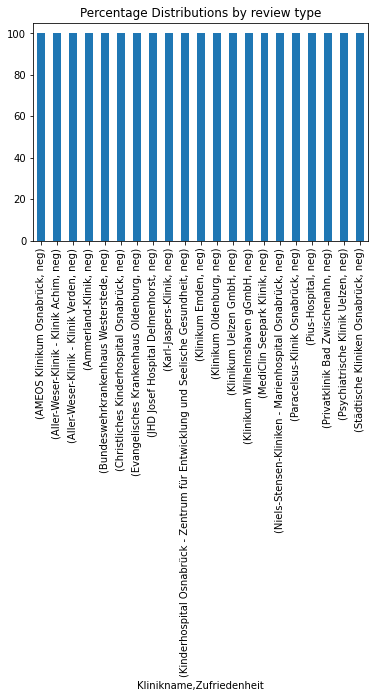

In [65]:
### Checking for the Distribution of Default ###
print(round(df.groupby('Klinikname').Zufriedenheit.value_counts(normalize=True)*100,2))
round(df.groupby('Klinikname').Zufriedenheit.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

Independent_var = df.Erfahrungsbericht
Dependent_var = df.Zufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 2424
IV_test  : 607
DV_train : 2424
DV_test  : 607


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [73]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'neg'

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

NameError: name 'predictions' is not defined

# Textblob

In [74]:
reviews = [str(a) for a in df['Erfahrungsbericht']]
resultPolarity = []

In [75]:
for review in reviews:
    bewertungen = TextBlobDE(review)
    resultPolarity.append(bewertungen.polarity)

In [76]:
len(resultPolarity)

3031

In [77]:
resultPolarity

[0.12564102564102564,
 -0.06764705882352941,
 0.03974358974358974,
 0.08437499999999999,
 0.18478260869565216,
 0.1,
 -0.10308641975308643,
 0.6802564102564103,
 -0.2,
 -0.013636363636363629,
 0.2233333333333333,
 -0.00454545454545455,
 0.2222222222222222,
 0.37270833333333336,
 0.00555555555555556,
 0.2125,
 0.04523809523809524,
 0.4192307692307693,
 -0.085,
 -0.16466666666666666,
 0.3009259259259259,
 0.27,
 0.7111111111111111,
 0.5094444444444445,
 0.38571428571428573,
 0.5,
 -0.08409090909090909,
 0.36311111111111116,
 0.41,
 0.04583333333333334,
 0.5033333333333333,
 0.5785714285714285,
 -0.3407407407407408,
 0.8375,
 0.3852941176470588,
 0.0,
 0.13636363636363638,
 0.04999999999999999,
 0.0,
 0.5875,
 0.16875,
 0.5,
 0.3944444444444444,
 -0.04754901960784313,
 0.12986111111111112,
 0.294,
 -0.09166666666666663,
 0.4142857142857143,
 0.6285714285714287,
 0.3092592592592593,
 0.375,
 0.38571428571428573,
 0.15357142857142855,
 0.809375,
 0.5380952380952381,
 0.7000000000000001,
 0.

In [78]:
df['Polarity Level'] = resultPolarity

In [79]:
df.round(2).head(30)

,Klinikname,Erfahrungsbericht,Gesamtzufriedenheit,Extraktionsdatum,Zufriedenheit,ist_zufrieden,Polarity Level
0,MediClin Seepark Klinik,Hatte mir mehr versprochen Die Organisation l...,0,01.06.2021,neg,0,0.13
1,MediClin Seepark Klinik,Es war die absolute Hölle! Die Therapeuten ka...,0,01.06.2021,neg,0,-0.07
2,MediClin Seepark Klinik,Als grundpositiv eingestellter Mensch wollte i...,0,01.06.2021,neg,0,0.04
3,MediClin Seepark Klinik,Ich war für ca 5 Monate in der Klinik gewesen....,0,01.06.2021,neg,0,0.08
4,MediClin Seepark Klinik,"Als ich in die Klinik ankam, wurde ich freundl...",1,01.06.2021,neg,0,0.18
5,MediClin Seepark Klinik,Eine sehr slechte Klinik die mich wenig gutes ...,0,01.06.2021,neg,0,0.10
6,MediClin Seepark Klinik,Diese Bewertung bezieht sich auf die Akutstati...,0,01.06.2021,neg,0,-0.10
7,MediClin Seepark Klinik,Ich war selbst mehrfach im Akutbereich der SPK...,1,01.06.2021,neg,0,0.68
8,MediClin Seepark Klinik,"Ich soll in diese Klinik, weil es mir schlecht...",0,01.06.2021,neg,0,-0.20
9,MediClin Seepark Klinik,"Als erstes, wenn möglich sucht euch eine ander...",0,01.06.2021,neg,0,-0.01


In [82]:
final_df = df.groupby(['Klinikname'])['Polarity Level'].mean()

In [86]:
final_df.sort_values(ascending=True)

Klinikname
AMEOS Klinikum Osnabrück                                                       0.090983
Klinikum Uelzen GmbH                                                           0.099841
Karl-Jaspers-Klinik                                                            0.139655
Klinikum Emden                                                                 0.175590
Christliches Kinderhospital Osnabrück                                          0.183647
JHD Josef Hospital Delmenhorst                                                 0.190867
Städtische Kliniken Osnabrück                                                  0.211019
Niels-Stensen-Kliniken - Marienhospital Osnabrück                              0.224563
Evangelisches Krankenhaus Oldenburg                                            0.237228
Aller-Weser-Klinik - Klinik Achim                                              0.242947
Privatklinik Bad Zwischenahn                                                   0.249449
Ammerland-Klinik     